<center><h1> Classification Models - Google's Quick-Draw Doodles </h1></center>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Plotting library
% matplotlib inline
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading X_train
with open('xtrain_doodle.pickle','rb') as f:
    X_train = pickle.load(f)

# Loading X_test
with open('xtest_doodle.pickle','rb') as f:
    X_test = pickle.load(f)
    
# Loading y_train
with open('ytrain_doodle.pickle','rb') as f:
    y_train = pickle.load(f)

# Loading y_test
with open('ytest_doodle.pickle','rb') as f:
    y_test = pickle.load(f)

## K-Nearest Neighbors

By simply randomly guessing, one should be able to reach ~10% accuracy (since there are only ten class labels). A machine learning algorithm will need to obtain > 10% accuracy in order to demonstrate that it has in fact “learned” something (or found an underlying pattern in the data).

To start, we’ll model the data with the k-Nearest Neighbor (k-NN) classifier, arguably the most simple, easy to understand machine learning algorithm. The k-NN algorithm classifies unknown data points by finding the most common class among the k-closest examples. Each data point in the k closest examples casts a vote and the category with the most votes is chosen.

In [3]:
# Base model
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
KNN accuracy:  0.823444444444


In [4]:
# Tuning number of neighbors
parameters = {'n_neighbors': np.arange(1,6,1)}

knn = KNeighborsClassifier(n_jobs=-1)
knn = GridSearchCV(knn, parameters, n_jobs=-1)
knn.fit(X_train, y_train)

results_knn = pd.DataFrame(knn.cv_results_)
results_knn.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
4,15.105592,301.978185,0.803667,0.858048,5,{'n_neighbors': 5},1,0.798229,0.859541,0.807115,0.859153,0.805659,0.855449,1.015940,1.277753,0.003892,0.001844
3,18.100580,294.929707,0.799762,0.866691,4,{'n_neighbors': 4},2,0.794088,0.869115,0.805401,0.865938,0.799800,0.865019,3.007176,0.974213,0.004619,0.001755
2,12.885861,333.759502,0.798143,0.880429,3,{'n_neighbors': 3},3,0.791946,0.883046,0.803972,0.881366,0.798514,0.876875,4.299475,28.666123,0.004917,0.002605
0,3.535875,340.273409,0.792952,1.000000,1,{'n_neighbors': 1},4,0.784093,1.000000,0.797828,1.000000,0.796942,1.000000,0.547114,4.405987,0.006277,0.000000
1,6.729996,351.736079,0.775095,0.896453,2,{'n_neighbors': 2},5,0.768528,0.901550,0.776682,0.897222,0.780080,0.890587,0.684796,0.809753,0.004848,0.004509


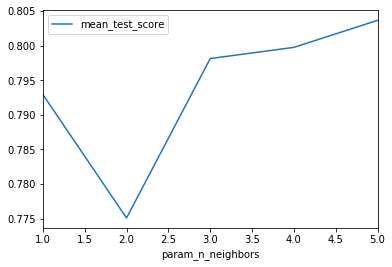

In [5]:
# Plot results of grid search
results_knn.plot('param_n_neighbors','mean_test_score')

In [6]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')
KNN accuracy:  0.819555555556


From examining our plot and using the elbow-method using 3 neighbors seems like the best choice to avoid overfitting. The main advantage of the KNN algorithm is that it performs well with multi-modal classes because the basis of its decision is based on a small neighborhood of similar objects. This is why its results were fairly high with **80%**. The main disadvantage is the computational cost are very high and the results take far too long. 


## Random Forest
Random forests is an ensemble model which means that it uses the results from many different models to calculate a label

In [7]:
# Base RFC model
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
print(rfc)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print ('Random forest accuracy: ',acc_rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
Random forest accuracy:  0.741222222222


In [8]:
# Tuning number of estimators in the ensemble method
parameters = {'n_estimators': np.arange(10,150,10)}
rfc = RandomForestClassifier(random_state=1, n_jobs=-1)
rfc_gs = GridSearchCV(rfc, parameters, n_jobs=-1)
rfc_gs.fit(X_train, y_train)

results_rfc_gs = pd.DataFrame(rfc_gs.cv_results_)
results_rfc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
13,20.792711,1.123660,0.796857,1.000000,140,{'n_estimators': 140},1,0.794659,1.000000,0.797257,1.000000,0.798657,1.000000,0.202235,0.350724,0.001656,0.000000
12,18.930360,3.998305,0.795905,1.000000,130,{'n_estimators': 130},2,0.794231,1.000000,0.795685,1.000000,0.797799,1.000000,1.331909,1.166958,0.001465,0.000000
11,21.582265,2.621986,0.795333,1.000000,120,{'n_estimators': 120},3,0.792375,1.000000,0.795542,1.000000,0.798085,1.000000,0.096863,0.078635,0.002336,0.000000
10,20.006148,3.427830,0.795048,1.000000,110,{'n_estimators': 110},4,0.793374,1.000000,0.794971,1.000000,0.796799,1.000000,0.166841,0.360009,0.001399,0.000000
9,14.886179,4.488992,0.794714,1.000000,100,{'n_estimators': 100},5,0.794659,1.000000,0.791970,1.000000,0.797514,1.000000,1.690347,1.596608,0.002263,0.000000
8,16.146473,2.290540,0.794143,1.000000,90,{'n_estimators': 90},6,0.792660,1.000000,0.794685,1.000000,0.795084,1.000000,0.151948,0.256432,0.001061,0.000000
7,13.056737,4.379617,0.792619,1.000000,80,{'n_estimators': 80},7,0.791232,1.000000,0.793113,1.000000,0.793512,1.000000,1.833468,0.999864,0.000994,0.000000
6,10.702371,2.179835,0.791524,1.000000,70,{'n_estimators': 70},8,0.790804,1.000000,0.791542,1.000000,0.792226,1.000000,1.191508,1.318801,0.000581,0.000000
5,10.107294,2.427174,0.787286,1.000000,60,{'n_estimators': 60},9,0.785378,1.000000,0.785969,1.000000,0.790512,1.000000,0.591262,0.508753,0.002293,0.000000
4,6.643894,3.807814,0.784714,0.999952,50,{'n_estimators': 50},10,0.780665,0.999929,0.784398,0.999929,0.789083,1.000000,0.588176,0.759888,0.003444,0.000034


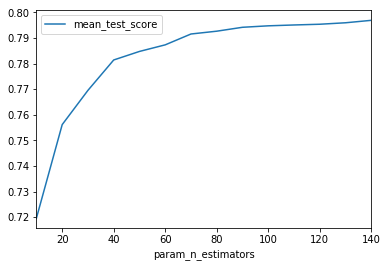

In [9]:
# Plot results of grid search
results_rfc_gs.plot('param_n_estimators','mean_test_score')

In [10]:
# Tuning max features
parameters = {'max_features':['sqrt',.1,.3,.5]}

rfc = RandomForestClassifier(n_estimators= 80, random_state=1, n_jobs=-1)
rfc_gs = GridSearchCV(rfc, parameters, n_jobs=-1)
rfc_gs.fit(X_train, y_train)

results_rfc_gs = pd.DataFrame(rfc_gs.cv_results_)
results_rfc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,9.328711,5.434796,0.792952,1.0,sqrt,{'max_features': 'sqrt'},1,0.791375,1.0,0.793685,1.0,0.793798,1.0,2.523693,0.301510,0.001117,0.0
1,34.772647,5.717704,0.791905,1.0,0.1,{'max_features': 0.1},2,0.791518,1.0,0.791399,1.0,0.792798,1.0,1.353872,0.455378,0.000633,0.0
2,94.092957,3.717724,0.787286,1.0,0.3,{'max_features': 0.3},3,0.782522,1.0,0.786970,1.0,0.792369,1.0,0.684241,0.639052,0.004027,0.0
3,114.136747,0.413934,0.780619,1.0,0.5,{'max_features': 0.5},4,0.775525,1.0,0.781683,1.0,0.784653,1.0,9.244127,0.201465,0.003802,0.0


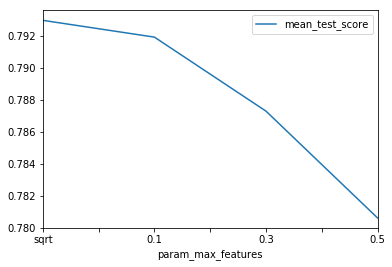

In [11]:
# Plot results of grid search
results_rfc_gs.plot('param_max_features','mean_test_score')

In [12]:
# Modeling RFC with best hyper-parameters
rfc = RandomForestClassifier(n_estimators=80, max_features='sqrt', random_state=1, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print ('Random forest accuracy: ',acc_rfc)

Random forest accuracy:  0.804555555556


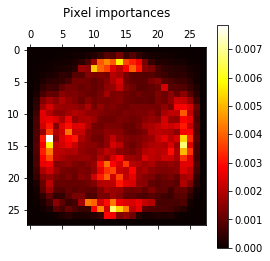

In [13]:
# Seeing what pixels are the most important in deciding the label
importances = rfc.feature_importances_
importances = importances.reshape((28,28))
fig = plt.matshow(importances, cmap=plt.cm.hot)
plt.title('Pixel importances\n')
plt.colorbar()

The random forest had an accuracy score very close to the k-nn model. The features that are most important are on the edge and in the middle of each side.

## Support Vector Machine 
SVM classification uses planes in space to divide data points. We can compared a linear divider a non-linear divider


#### LinearSVC

In [14]:
lsvc = LinearSVC(random_state=1)
lsvc.fit(X_train, y_train)
print(lsvc)
y_pred_lsvc = lsvc.predict(X_test)
acc_lsvc = accuracy_score(y_test, y_pred_lsvc)
print('Linear SVC accuracy: ',acc_lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)
Linear SVC accuracy:  0.717777777778


#### Non-Linear SVM (Radial Basis Function)

In [15]:
svc = SVC(kernel='rbf', random_state=1) 
svc.fit(X_train, y_train)
print(svc)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print ('Gaussian Radial Basis Function SVC Accuracy: ',acc_svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
Gaussian Radial Basis Function SVC Accuracy:  0.781555555556


## Multi-Layer Perceptron

A perceptron is a neural network with a very basic architecture. This will be good to compare against the convolutional neural network. Neural Networks receive an input (a single vector), and transform it through a series of hidden layers. Each hidden layer is made up of a set of neurons, where each neuron is fully connected to all neurons in the previous layer, and where neurons in a single layer function completely independently and do not share any connections. The last fully-connected layer is called the “output layer” and in classification settings it represents the class scores.

For tuning the hyper-parameters for a Multi-Layer Perceptron, we can try different number of layers and number of neurons in each layer. The default activiation function (ReLu) is the most effective choice from sklearn and the the defualt optimization algorithm (adam) is the best choice due to the size of our dataset. 

In [16]:
# Base model
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
print(mlp)
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print ('mlp accuracy: ',acc_mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
mlp accuracy:  0.809888888889


In [17]:
parameters = {'hidden_layer_sizes' : [(100,),(784,), (100,100),(100,100,100)] }

mlp = MLPClassifier(random_state=1)
mlp = GridSearchCV(mlp, parameters, n_jobs=-1)
mlp.fit(X_train, y_train)

results=pd.DataFrame(mlp.cv_results_)
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,460.535727,0.263031,0.829905,0.999857,"(784,)","{'hidden_layer_sizes': (784,)}",1,0.828788,1.000000,0.830547,0.999714,0.830380,0.999857,13.319401,0.047127,0.000793,0.000117
0,251.247346,0.083445,0.796714,0.998000,"(100,)","{'hidden_layer_sizes': (100,)}",2,0.795088,1.000000,0.794113,0.998072,0.800943,0.995929,84.519119,0.000940,0.003016,0.001663
2,232.659894,0.102394,0.796619,0.977883,"(100, 100)","{'hidden_layer_sizes': (100, 100)}",3,0.794802,1.000000,0.799686,0.934790,0.795370,0.998857,98.468281,0.004630,0.002181,0.030474
3,189.648889,0.095782,0.782476,0.970644,"(100, 100, 100)","{'hidden_layer_sizes': (100, 100, 100)}",4,0.777524,0.979853,0.787255,0.989144,0.782652,0.942937,42.346962,0.014740,0.003975,0.019956


In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(784,),random_state=1)
mlp.fit(X_train, y_train)
print(mlp)
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print ('mlp accuracy: ',acc_mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(784,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
mlp accuracy:  0.845666666667


## Convolutional Neural Networks (CNN / ConvNet)

The Convolutional Neural Network architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

In [19]:
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [20]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

# reshape to be [samples][width][height][pixels] 
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

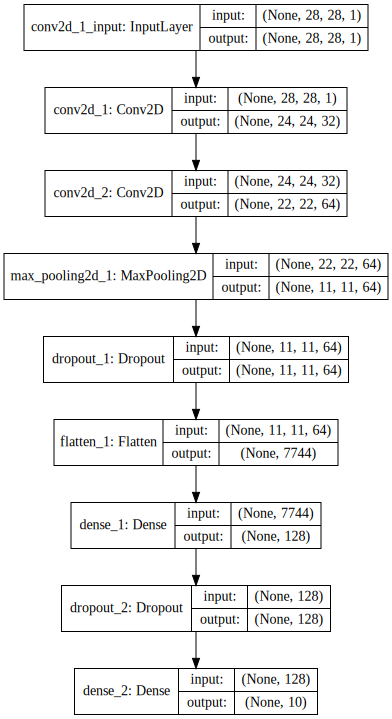

In [22]:
SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
cnn_model = model.fit(X_train_cnn, y_train_cnn,
          batch_size=32,
          epochs=20,
          validation_data=(X_test_cnn, y_test_cnn))

Train on 21000 samples, validate on 9000 samples
Epoch 1/20
21000/21000 [==============================] - 53s 3ms/step - loss: 0.7748 - acc: 0.7587 - val_loss: 0.4207 - val_acc: 0.8673
Epoch 2/20
21000/21000 [==============================] - 52s 2ms/step - loss: 0.4729 - acc: 0.8561 - val_loss: 0.3637 - val_acc: 0.8891
Epoch 3/20
21000/21000 [==============================] - 52s 2ms/step - loss: 0.3961 - acc: 0.8822 - val_loss: 0.3438 - val_acc: 0.8966
Epoch 4/20
21000/21000 [==============================] - 52s 2ms/step - loss: 0.3400 - acc: 0.8957 - val_loss: 0.3198 - val_acc: 0.9020
Epoch 5/20
21000/21000 [==============================] - 52s 2ms/step - loss: 0.2939 - acc: 0.9072 - val_loss: 0.3196 - val_acc: 0.9043
Epoch 6/20
21000/21000 [==============================] - 53s 3ms/step - loss: 0.2571 - acc: 0.9176 - val_loss: 0.3265 - val_acc: 0.9044
Epoch 7/20
21000/21000 [==============================] - 53s 3ms/step - loss: 0.2292 - acc: 0.9251 - val_loss: 0.3189 - val_acc:

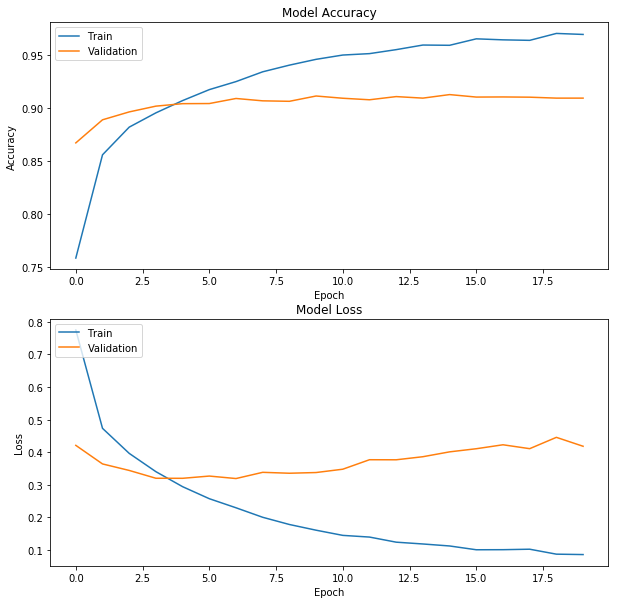

In [25]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1 = plt.plot(cnn_model.history['acc'])
ax1 = plt.plot(cnn_model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

ax2 = plt.subplot(2,1,2)
ax2 = plt.plot(cnn_model.history['loss'])
ax2 = plt.plot(cnn_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
cnn_score = model.evaluate(X_test_cnn, y_test_cnn, verbose=1)

9000/9000 [==============================] - 5s 551us/step


In [27]:
print('Test Loss:', cnn_score[0])
print('Test Accuracy:', cnn_score[1])

Test Loss: 0.417930712955
Test Accuracy: 0.909555555556


In [28]:
y_pred_cnn = model.predict_classes(X_test_cnn, verbose=0)

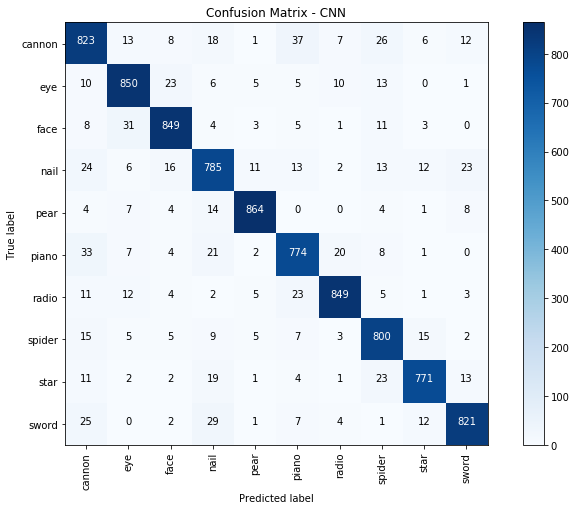

In [48]:
import itertools

# Create a dict with label codes
label_dict = {0:'cannon',1:'eye', 2:'face', 3:'nail', 4:'pear', 
              5:'piano',6:'radio', 7:'spider', 8:'star', 9:'sword'}

# Compute confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_cnn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure(figsize=(10,7))
fig = plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
_ =plt.title('Confusion Matrix - CNN')
_ = plt.colorbar()
_ = tick_marks = np.arange(len(label_dict))
_ = plt.xticks(tick_marks, label_dict.values(), rotation=90)
_ = plt.yticks(tick_marks, label_dict.values())
_ = plt.tight_layout()
_ = plt.ylabel('True label')
_ = plt.xlabel('Predicted label')
thresh = cf_matrix.max() / 2.
for i, j in itertools.product(range(cf_matrix.shape[0]), range(cf_matrix.shape[1])):
    plt.text(j, i, cf_matrix[i, j], horizontalalignment="center",
                color="white" if cf_matrix[i, j] > thresh else "black")

#### Using the Model for Predicting

In [30]:
test_image = np.expand_dims(X_test_cnn[9], axis=3)
test_image = test_image.reshape(1,28, 28,1)

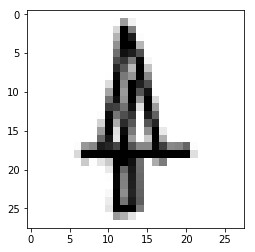

In [31]:
plt.imshow(X_test_cnn[9][:,:,0], cmap=plt.get_cmap('binary'))

In [32]:
print(label_dict,# Dictionary to match label with code
      '\n','\n',
      y_test_cnn[9],# True/False (1/0) of label. Code = position of True
      '\n','\n',
      np.where(y_test_cnn[9] == 1)) # The code 

{0: 'cannon', 1: 'eye', 2: 'face', 3: 'nail', 4: 'pear', 5: 'piana', 6: 'radio', 7: 'spider', 8: 'star', 9: 'sword'} 
 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] 
 
 (array([9], dtype=int64),)


In [33]:
model.predict_classes(test_image,batch_size=1)

array([9], dtype=int64)

### Patterns Uncovered in Hidden Layers - Sword

In [34]:
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [35]:
def display_activations(activation_maps):
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.figure(figsize=(25,10))
        plt.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

In [36]:
activations = get_activations(model, test_image)

----- activations -----
(1, 24, 24, 32)
(1, 22, 22, 64)
(1, 11, 11, 64)
(1, 11, 11, 64)
(1, 7744)
(1, 128)
(1, 128)
(1, 10)


Displaying activation map 0


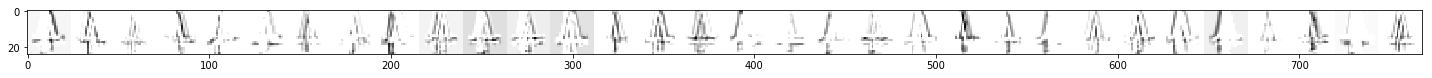

Displaying activation map 1


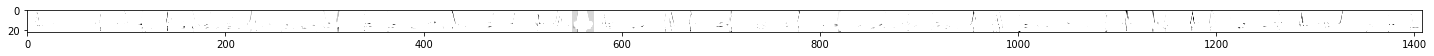

Displaying activation map 2


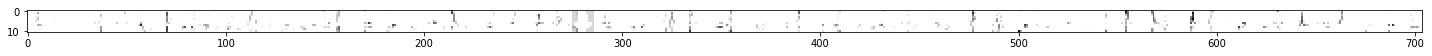

Displaying activation map 3


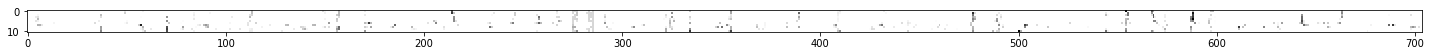

Displaying activation map 4


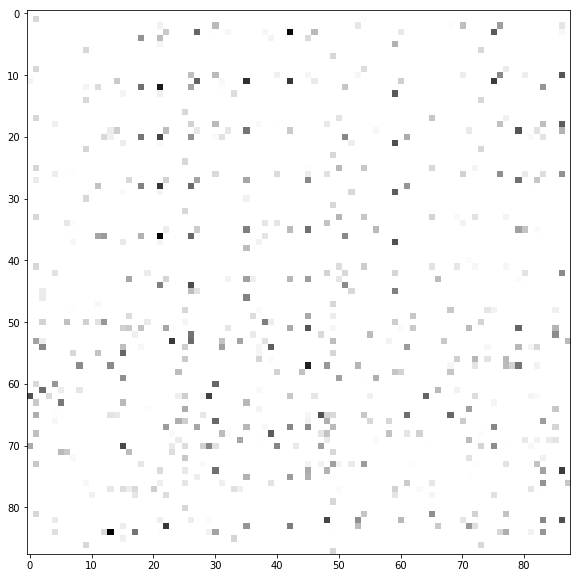

Displaying activation map 5


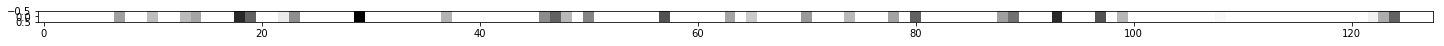

Displaying activation map 6


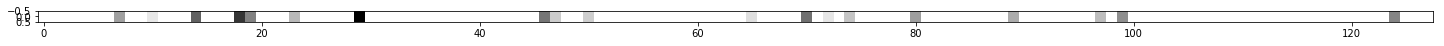

Displaying activation map 7


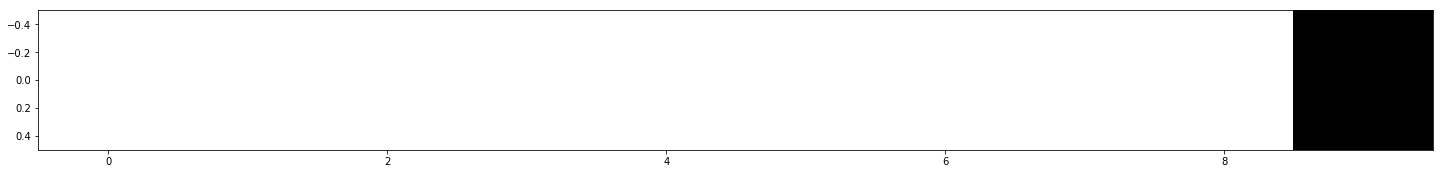

In [37]:
display_activations(activations)

## Transfer Learning - VGG16

In [38]:
from keras import applications
from skimage.transform import resize
import cv2

batch_size = 128
num_classes = 10
epochs = 50

vgg_model = applications.VGG16(weights='imagenet', include_top=False)
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

#### X_Train

In [39]:
# Resize the heighth and width to meet the minimum - X_train
resized_train = np.empty((0,56,56))

for line in X_train_cnn:
    img = cv2.resize(line, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    resized_train = np.append(resized_train, [img], axis=0)
    
# Turn grayscale into RGB
X_train_tl = np.stack((resized_train,)*3, -1)
    
bottleneck_features_train = vgg_model.predict(X_train_tl,verbose=1)

21000/21000 [==============================] - 418s 20ms/step


#### X_Test

In [40]:
# Resize the heighth and width to meet the minimum - X_test
resized_test = np.empty((0,56,56))

for line in X_test_cnn:
    img = cv2.resize(line, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    resized_test = np.append(resized_test, [img], axis=0)
    
# Turn grayscale into RGB
X_test_tl = np.stack((resized_test,)*3, -1)

bottleneck_features_test = vgg_model.predict(X_test_tl,verbose=1)

9000/9000 [==============================] - 179s 20ms/step


In [41]:
clf_model = Sequential()
clf_model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
clf_model.add(Dense(512, activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(256, activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(num_classes, activation='softmax'))

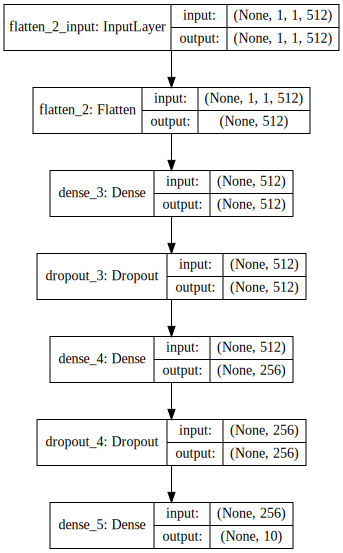

In [42]:
SVG(model_to_dot(clf_model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [43]:
clf_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [44]:
clf_model.fit(bottleneck_features_train, y_train_cnn,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/50
21000/21000 [==============================] - 2s 112us/step - loss: 0.8854 - acc: 0.7144
Epoch 2/50
21000/21000 [==============================] - 2s 110us/step - loss: 0.4866 - acc: 0.8549
Epoch 3/50
21000/21000 [==============================] - 2s 107us/step - loss: 0.4155 - acc: 0.8750
Epoch 4/50
21000/21000 [==============================] - 2s 105us/step - loss: 0.3857 - acc: 0.8854
Epoch 5/50
21000/21000 [==============================] - 2s 105us/step - loss: 0.3635 - acc: 0.8895
Epoch 6/50
21000/21000 [==============================] - 2s 103us/step - loss: 0.3397 - acc: 0.8981
Epoch 7/50
21000/21000 [==============================] - 2s 97us/step - loss: 0.3370 - acc: 0.8994
Epoch 8/50
21000/21000 [==============================] - 2s 99us/step - loss: 0.3197 - acc: 0.9061
Epoch 9/50
21000/21000 [==============================] - 2s 96us/step - loss: 0.3123 - acc: 0.9059
Epoch 10/50
21000/21000 [==============================] - 2s 99us/step - loss: 0.3002 - acc: 

# Predict and Test Model Performance

In [45]:
vgg16_score = clf_model.evaluate(bottleneck_features_test, y_test_cnn, verbose=1)

9000/9000 [==============================] - 1s 60us/step


In [46]:
print('Test loss:', vgg16_score[0])
print('Test accuracy:', vgg16_score[1])

Test loss: 0.319106397375
Test accuracy: 0.918666666667


# Results

In [49]:
print('KNN accuracy: ',acc_knn,
      '\n',
      'Random forest accuracy: ',acc_rfc,
      '\n',
      'Linear SVC accuracy: ',acc_lsvc,
      '\n',
      'Gaussian Radial Basis Function SVC Accuracy: ',acc_svc,
      '\n',
      'Multi-Layer Perceptron accuracy: ',acc_mlp,
      '\n',
      'Convolutional Neural Network Score:',cnn_score[1],
      '\n', 
      'Transfer Learning Score (VGG16)', vgg16_score[1]
     )

KNN accuracy:  0.819555555556 
 Random forest accuracy:  0.804555555556 
 Linear SVC accuracy:  0.717777777778 
 Gaussian Radial Basis Function SVC Accuracy:  0.781555555556 
 Multi-Layer Perceptron accuracy:  0.845666666667 
 Convolutional Neural Network Score: 0.909555555556 
 Transfer Learning Score (VGG16) 0.918666666667
